In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest




import ast
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from keras.models import Sequential
from autoencoder_module import AutoEncoder
from Data import train_test_split_count_matrix_baseline
import h5py
from Analysis import roc_curve_for_analysis

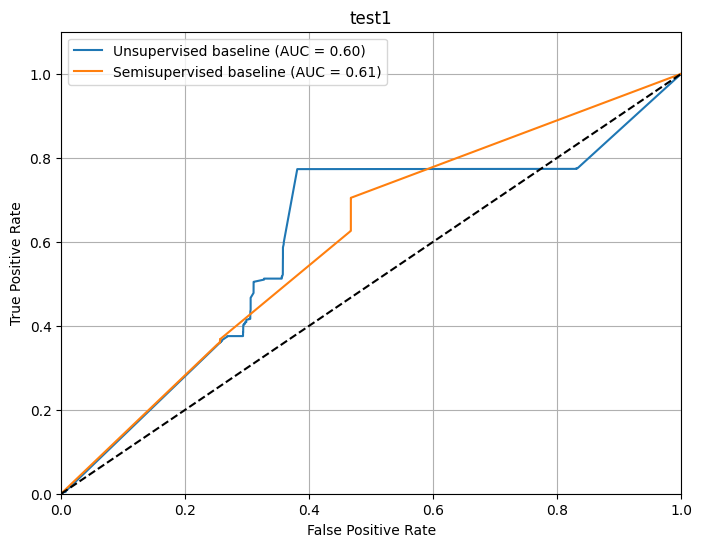

In [3]:
result_df = pd.read_csv('../Data/HDFS_v1/Results/results_with_sequential_models.csv')
result_df.columns
roc_data = {
    "Unsupervised baseline": {"scores": np.array(result_df['Result with unsupervised sequential baseline']), "labels": np.array(result_df['Label for result with unsupervised sequential baseline'])},
    "Semisupervised baseline": {"scores":np.array(result_df['Result with semisupervised sequential baseline']), "labels": np.array(result_df['Label for result with unsupervised sequential baseline'])}
    }

roc_curve_for_analysis((8,6), roc_data, 'test1', 'test.png', save = False)

In [2]:
def difference_calculating_function_cosine_dissimilarity(predictions, real_count_vectors):
    difference_vector = np.zeros(len(predictions))
    
    #Loop through each pair of corresponding vectors
    for i in range(len(predictions)):
        vector_a = predictions[i]
        vector_b = real_count_vectors[i]
            
        dot_product = np.dot(vector_a, vector_b)
        norm_a = np.linalg.norm(vector_a)
        norm_b = np.linalg.norm(vector_b)
            
        cosine_similarity = dot_product / (norm_a * norm_b)
        difference_vector[i] = 1 - cosine_similarity
        
    return difference_vector

def difference_calculating_function_l_norm(predictions,  real_count_vectors):
    difference_vector = np.zeros(len(predictions))
    for i in range(len(predictions)):
        vector_a = predictions[i]
        vector_b = real_count_vectors[i]

        difference_vector[i] = np.linalg.norm(vector_a-vector_b, ord = 1)
    return difference_vector

## Unsupervised baseline

In [3]:
x_train_np, x_test_np, y_test_np = train_test_split_count_matrix_baseline('../Data/HDFS_v1/Processed_data/processed_labeled_data.csv', 0.2)
print(len(x_test_np), len(y_test_np))

115013 115013


In [5]:
import random
n = 1000
selected_numbers = random.sample(range(111644), n)

indexes = []
j = 0
for i in range(len(y_test_np)):
    if y_test_np[i] == 1 and j<=1000:
        indexes.append(i)
        j += 1
print(len(indexes), len(selected_numbers))
selected_indices = selected_numbers + indexes
x_test_final = []
y_test_final = []
i = 0
for index in (selected_indices):
    x_test_final.append(x_test_np[index])
    y_test_final.append(y_test_np[index])

1001 1000


In [ ]:
#x_train_np, x_test_np, y_test_np = train_test_split_count_matrix_baseline('../Data/HDFS_v1/Processed_data/processed_labeled_data.csv', 0.2)
tf.keras.utils.disable_interactive_logging()
numbers_of_neurons = [48,32,24,16,8,4,8,16,24,32,48]
activation_functions = ['relu']*len(numbers_of_neurons)
kernel_initializers = ['he_uniform'] * len(numbers_of_neurons)

init_dictionary = {'number of neurons' : numbers_of_neurons,
                'activation function': activation_functions,
                'kernel initializer': kernel_initializers,
                'learning rate': 0.01,
                'loss function': 'mean_squared_error'}
model_number = "model" + str(6)
fit_dictionary = {'x_train' : x_train_np,
                    'epochs': 100,
                    'batch size': 128,
                    'validation split': 0.2,
                    'path': "../Models/" + model_number + "/autoencoder_model_unsupervised_sequential_baseline.keras"
    }
autoencoder = AutoEncoder(init_dictionary)
autoencoder.model.summary()
autoencoder.model = load_model("../Models/" + model_number + "/autoencoder_model_unsupervised_sequential_baseline.keras", custom_objects={"AutoEncoder": AutoEncoder})
result = autoencoder.evaluate_count_matrix(x_test_np, y_test_np, 0.2, difference_calculating_function_cosine_dissimilarity)
y_test_final_np = np.array(y_test_np)
result_dict = {'Result with unsupervised sequential baseline': result, 'Label for result with unsupervised sequential baseline': y_test_final_np}
result_df = pd.DataFrame(data = result_dict)
result_df.to_csv('../Data/HDFS_v1/Results/results_with_sequential_models.csv')

NameError: name 'y_test_final' is not defined

In [ ]:
x_train_np, x_test_np, y_test_np = train_test_split_count_matrix_baseline('../Data/HDFS_v1/Processed_data/processed_labeled_data.csv', 0.2, True)

numbers_of_neurons = [48,32,24,16,8,4,8,16,24,32,48]
activation_functions = ['relu']*len(numbers_of_neurons)
kernel_initializers = ['he_uniform'] * len(numbers_of_neurons)

init_dictionary = {'number of neurons' : numbers_of_neurons,
                'activation function': activation_functions,
                'kernel initializer': kernel_initializers,
                'learning rate': 0.01,
                'loss function': 'mean_squared_error'}
model_number = "model" + str(6)
fit_dictionary = {'x_train' : x_train_np,
                    'epochs': 100,
                    'batch size': 128,
                    'validation split': 0.2,
                    'path': "../Models/" + model_number + "/autoencoder_model_semisupervised_sequential_baseline.keras"
    }
autoencoder = AutoEncoder(init_dictionary)
autoencoder.model.summary()
autoencoder.model = load_model("../Models/" + model_number + "/autoencoder_model_semisupervised_sequential_baseline.keras", custom_objects={"AutoEncoder": AutoEncoder})
result = autoencoder.evaluate_count_matrix(x_test_np, y_test_np, 0.2, difference_calculating_function_cosine_dissimilarity)
y_test_final_np = np.array(y_test_np)
result_df = pd.read_csv('../Data/HDFS_v1/Results/results_with_sequential_models.csv')
result_df['Result with semisupervised sequential baseline'] = result
result_df['Label for result with semisupervised sequential baseline'] = y_test_final_np
result_df.to_csv('../Data/HDFS_v1/Results/results_with_sequential_models.csv')

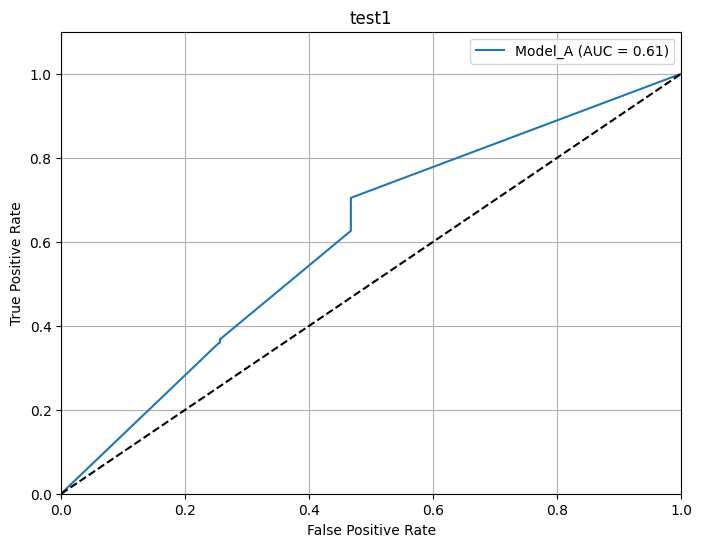

In [10]:
roc_data = {
    "Model_A": {"scores": result, "labels": np.array(y_test_np)}}
roc_curve_for_analysis((8,6), roc_data, 'test1', 'test.png', save = False)

numpy.ndarray

In [16]:
np.shape(autoencoder.model.predict(x_test_np[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


(13, 48)

In [2]:
x_train_np, x_test_np, y_test_np = train_test_split_count_matrix_baseline('../Data/HDFS_v1/Processed_data/processed_labeled_data.csv', 0.2)


np.save("../Data/HDFS_v1/Processed_data/x_train_np.npy", x_train_np)

with h5py.File("../Data/HDFS_v1/Processed_data/y_test_np.h5", "w") as f:
    f.create_dataset("float_list", data=y_test_np)
# Save
with h5py.File("../Data/HDFS_v1/Processed_data/x_test_np.h5", "w") as f:
    for i, arr in enumerate(x_test_np):
        f.create_dataset(f"array_{i}", data=arr)

In [3]:
x_train_np = np.load("../Data/HDFS_v1/Processed_data/x_train_np.npy")

with h5py.File("../Data/HDFS_v1/Processed_data/x_test_np.h5", "r") as f:
    x_test_np = [f[f"array_{i}"][:] for i in range(len(f))]

with h5py.File("../Data/HDFS_v1/Processed_data/y_test_np.h5", "r") as f:
    y_test_np = f["float_list"][:]